In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import fiona
from shapely.geometry import Point, shape
from gisutils import df2shp, project
from pydrograph import Nwis

### shapefile of study area

In [2]:
# input files
extent_shp = '../data/bbox.shp' # polygon of study area
epsg = 26915

### reproject the study area polygon to lat/lon

In [3]:
extent_poly = shape(fiona.open(extent_shp).next()['geometry'])
extent_poly_ll = project(extent_poly, "+init=epsg:{}".format(epsg), "+init=epsg:4269")
extent_poly_ll.bounds

<ipython-input-3-aaca4be80a80>:1: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  extent_poly = shape(fiona.open(extent_shp).next()['geometry'])
/Users/aleaf/anaconda3/envs/gis/lib/python3.8/site-packages/pyproj/crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)


(-92.7, 46.7, -92.6, 46.79999999999999)

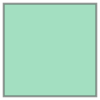

In [4]:
extent_poly_ll

### instantiate NWIS object using polygon
* fetches inventory tables of all dv and misc field measurements within the polygon
* `get_gw_sites` and `get_sw_sites` fetches all daily values and field measurements for groundwater and surface water (default=True)

In [5]:
nwis = Nwis(extent=extent_poly_ll, get_sw_sites=False)

Fetching site info...


### field measurements inventory table

In [6]:
nwis.gwfield_sites.head()

,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,district_cd,...,qw_begin_date,qw_end_date,qw_count_nu,gw_begin_date,gw_end_date,gw_count_nu,sv_begin_date,sv_end_date,sv_count_nu,geometry
site_no,,,,,,,,,,,,,,,,,,,,,
464205092364101,464205092364101,049N18W27BDC 01 000052...,GW,46.701334,-92.611582,M,S,NAD27,NAD83,27,...,--,--,0,1993-04-28,1993-04-28,1,--,--,0,POINT (-92.6115824 46.70133378)
464205092371801,464205092371801,049N18W28ADC 01 000011...,GW,46.701334,-92.621860,M,S,NAD27,NAD83,27,...,--,--,0,1985-04-25,1985-04-25,1,--,--,0,POINT (-92.6218605 46.70133387)
464222092403801,464222092403801,FDLGWSW02 049N18W30BBDA 01 RicePortage 000068...,GW,46.706111,-92.677083,G,S,NAD83,NAD83,27,...,--,--,0,2006-06-01,2010-05-03,30,--,--,0,POINT (-92.67708330000001 46.7061111)
464244092372701,464244092372701,049N18W21DBD 01 000051...,GW,46.712167,-92.624360,M,S,NAD27,NAD83,27,...,--,--,0,1993-08-28,1993-08-28,1,--,--,0,POINT (-92.6243604 46.7121672)
464321092402301,464321092402301,FDLGWSW13 049N18W19BABA 01 W 1st Bridg 000068...,GW,46.722417,-92.673028,G,F,NAD83,NAD83,27,...,--,--,0,2007-06-05,2010-05-03,18,--,--,0,POINT (-92.6730278 46.72241667)


### daily values sites inventory table

In [7]:
nwis.gwdv_sites.head()

,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,district_cd,...,qw_begin_date,qw_end_date,qw_count_nu,gw_begin_date,gw_end_date,gw_count_nu,sv_begin_date,sv_end_date,sv_count_nu,geometry
site_no,,,,,,,,,,,,,,,,,,,,,
464222092403801,464222092403801,FDLGWSW02 049N18W30BBDA 01 RicePortage 000068...,GW,46.706111,-92.677083,G,S,NAD83,NAD83,27,...,--,--,0,2006-06-01,2010-05-03,30,--,--,0,POINT (-92.67708330000001 46.7061111)
464322092401401,464322092401401,FDLGWSW01 049N18W18CDDD 01 1st Bridge 000068...,GW,46.722750,-92.670417,G,S,NAD83,NAD83,27,...,--,--,0,2006-06-01,2010-05-03,32,--,--,0,POINT (-92.6704167 46.72275)


### write shapefiles of the inventory tables
* `shapely Points` were created from the lat/lon coordinates when the tables were assembled; these are used to write the feature geometries for the shapefiles

In [8]:
df2shp(nwis.gwdv_sites, 'gw_dv_sites.shp', epsg=4269)
df2shp(nwis.gwfield_sites, 'gw_misc_sites.shp', epsg=4269)

writing gw_dv_sites.shp...
writing gw_misc_sites.shp...


### get daily values for a list of sites

In [9]:
sites = nwis.gwdv_sites.site_no.tolist()[0:2]
sites

[464222092403801, 464322092401401]

In [10]:
dvs = nwis.get_all_dvs(sites, 'gwlevels', start_date='1990-01-01')
dvs.keys()

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464222092403801&startDT=1990-01-01&parameterCd=72019
http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464322092401401&startDT=1990-01-01&parameterCd=72019


dict_keys([464222092403801, 464322092401401])

In [11]:
dvs[464222092403801].head()

,agency_cd,site_no,datetime,74007_72019_00003,74007_72019_00003_cd
datetime,,,,,
2006-07-01,USGS,464222092403801,2006-07-01,8.48,A
2006-07-02,USGS,464222092403801,2006-07-02,8.51,A
2006-07-03,USGS,464222092403801,2006-07-03,8.54,A
2006-07-04,USGS,464222092403801,2006-07-04,8.56,A
2006-07-05,USGS,464222092403801,2006-07-05,8.59,A


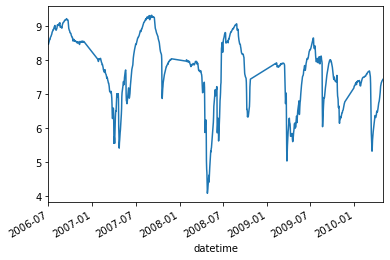

In [12]:
ax = dvs[464222092403801]['74007_72019_00003'].plot()

### get a single site

In [13]:
df = nwis.get_dvs(464322092401401, 'gwlevels')
df.head()

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464322092401401&startDT=1880-01-01&parameterCd=72019


,agency_cd,site_no,datetime,74012_72019_00003,74012_72019_00003_cd
datetime,,,,,
2006-07-01,USGS,464322092401401,2006-07-01,5.06,A
2006-07-02,USGS,464322092401401,2006-07-02,5.10,A
2006-07-03,USGS,464322092401401,2006-07-03,5.12,A
2006-07-04,USGS,464322092401401,2006-07-04,5.15,A
2006-07-05,USGS,464322092401401,2006-07-05,5.19,A


### just get the url for dvs for a site
(`start_date` is 1880-01-01 by default; `end_date` is `None` by default)

In [14]:
url = nwis.make_dv_url(464322092401401, parameter_code=72019)
url

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464322092401401&startDT=1880-01-01&parameterCd=72019


'http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=464322092401401&startDT=1880-01-01&parameterCd=72019'

## Fetch some miscellaneous measurements

In [15]:
sites = nwis.gwfield_sites.site_no.tolist()[:5]
sites

[464205092364101,
 464205092371801,
 464222092403801,
 464244092372701,
 464321092402301]

In [16]:
fm = nwis.get_all_measurements(sites, txt='gwlevels')

464205092364101
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=464205092364101&agency_cd=USGS&format=rdb
no data returned.
464205092371801
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=464205092371801&agency_cd=USGS&format=rdb
no data returned.
464222092403801
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=464222092403801&agency_cd=USGS&format=rdb
464244092372701
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=464244092372701&agency_cd=USGS&format=rdb
no data returned.
464321092402301
http://nwis.waterdata.usgs.gov/nwis/gwlevels?site_no=464321092402301&agency_cd=USGS&format=rdb


In [17]:
fm.head()

agency_cd          site_no site_tp_cd      lev_dt  \
site_no         datetime                                                       
464222092403801 2006-06-01      USGS  464222092403801         GW  2006-06-01   
                2006-06-23      USGS  464222092403801         GW  2006-06-23   
                2006-06-30      USGS  464222092403801         GW  2006-06-30   
                2006-07-21      USGS  464222092403801         GW  2006-07-21   
                2006-08-31      USGS  464222092403801         GW  2006-08-31   

                           lev_tm lev_tz_cd  lev_va  sl_lev_va  sl_datum_cd  \
site_no         datetime                                                      
464222092403801 2006-06-01  15:34       CDT    7.59        NaN          NaN   
                2006-06-23  07:58       CDT    8.30        NaN          NaN   
                2006-06-30  12:37       CDT    8.46        NaN          NaN   
                2006-07-21  07:34       CDT    8.90        NaN          NaN   
                2006-08-31  10:09       CDT    9.09        NaN          NaN   

                            lev_status_cd lev_agency_cd lev_dt_acy_cd  \
site_no         datetime                                                
464222092403801 2006-06-01            NaN          USGS             m   
                2006-06-23            NaN          USGS             m   
                2006-06-30            NaN          USGS             m   
                2006-07-21            NaN          USGS             m   
                2006-08-31            NaN          USGS             m   

                            lev_acy_cd lev_src_cd lev_meth_cd lev_age_cd  \
site_no         datetime                                                   
464222092403801 2006-06-01           2          S           V          A   
                2006-06-23           2          S           V          A   
                2006-06-30           2          S           V          A   
                2006-07-21           2          S           V          A   
                2006-08-31           2          S           V          A   

                           measurement_dt  
site_no         datetime                   
464222092403801 2006-06-01     2006-06-01  
                2006-06-23     2006-06-23  
                2006-06-30     2006-06-30  
                2006-07-21     2006-07-21  
                2006-08-31     2006-08-31